<a href="https://colab.research.google.com/github/Olamide-Faroun/Credit-Card-Fraud-Detection/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install kaggle package
!pip install opendatasets -q

In [ ]:
#importing libraries
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
od.download("https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/code")
df=pd.read_csv("/content/creditcardfraud/creditcard.csv")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: olamidefaroun
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


100%|██████████| 66.0M/66.0M [00:00<00:00, 75.4MB/s]


# **Descriptive Analysis**

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
print('Desscriptive Statistics for Amount:')
print(df['Amount'].describe())

print('\nDesscriptive Statistics for Time:')
print(df['Time'].describe())

Desscriptive Statistics for Amount:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Desscriptive Statistics for Time:
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


In [ ]:
df.duplicated().value_counts()

False    283726
True       1081
Name: count, dtype: int64

**There are 1081 duplicates in the datasets. These duplicates will be dropped to prevent bias in our model**

In [ ]:
# Remove duplicates and show new information
df.drop_duplicates(keep = 'first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [ ]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

**From the new dataset, we have 283253 Legitimate transactions and 473 Fraudulent transactions. This shows a highly imbalanced data.**

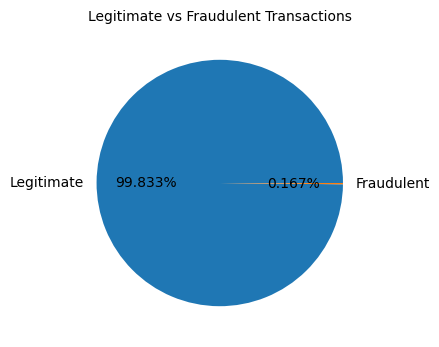

In [ ]:
plt.figure(figsize=(4, 4))  # Set the figure size
counts = df['Class'].value_counts()
labels = ['Legitimate', 'Fraudulent']
plt.pie(counts, labels=labels, autopct= '%1.3f%%')
plt.title('Legitimate vs Fraudulent Transactions', fontsize = 10)  # Set the title of the chart
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

The Pie chart shows a highly imbalanced dataset with 99.833% Legitimate transaction and 0.167% Fraudulent transaction.

**Correlation between Time and Amount in Fraudulent Transactions**

In [ ]:
fraud = df[df['Class'] == 1]

fraud ['Amount'].describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The average amount of fraudulent transactions was 123 pounds. The highest and lowest fraudulent transaction made was 2,125.87 pounds and 0 respectively.

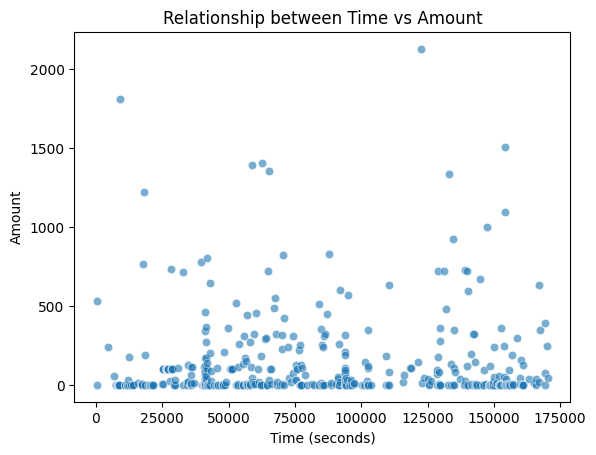

In [ ]:
sns.scatterplot(x='Time', y='Amount', data=fraud, alpha=0.6)

plt.title('Relationship between Time vs Amount')
plt.xlabel('Time (seconds)')
plt.ylabel('Amount')

plt.show()

**There is no  relationship between the time a fraudulent transaction occured and the amount**

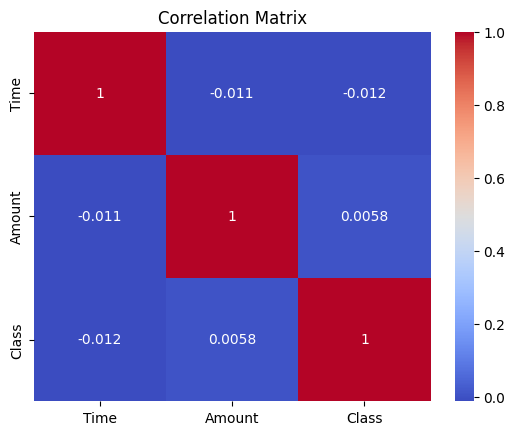

In [ ]:
corr_matrix = df[['Time', 'Amount', 'Class']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**There is no relationship between Time/Amount and Class. This implies that neither time nor Amount deteremines if fraudulent transaction.**

# **SECTION 2: PREPROCESSING**

In [ ]:
#recall dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**From the dataset, we can observe that there is a huge difference between our target features (Time and Amount) and we will have to fix that using feature scaling.**

**Spliting our data**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Class", axis='columns') #axis=1
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((198608, 30), (198608,), (85118, 30), (85118,))

**Checking the shape gives us an indepth idea of what our train_test_split has done**

**BALANCING THE DATASET**

We are going to try three different method of balancing and select the method with the best accuracy
1. Oversampling using SMOTE technique
2. Undersampling using NearMiss Algorithm.
3. Combining Random Oversampling and Undersampling using SMOTE-ENN

**Oversampling using SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

ovr_smp = SMOTE()
X_train_res, y_train_res = ovr_smp.fit_resample(X_train, y_train)

print('Shape of X_train before SMOTE: {}'.format(X_train.shape))
print('Shape of y_train before SMOTE: {} \n'.format(y_train.shape))

print('Shape of X_train after SMOTE: {}'.format(X_train_res.shape))
print('Shape of y_train after SMOTE: {} \n'.format(y_train_res.shape))

print('Balance of positive and negative classes (%): {}'.format(y_train_res.value_counts(normalize=True) * 100))

Shape of X_train before SMOTE: (198608, 30)
Shape of y_train before SMOTE: (198608,) 

Shape of X_train after SMOTE: (396538, 30)
Shape of y_train after SMOTE: (396538,) 

Balance of positive and negative classes (%): Class
0    50.0
1    50.0
Name: proportion, dtype: float64


**Using SMOTE, an equal balance in both classes was achieved but we risk overfitting our dataset.**

**UNDERSAMPLING**

In [ ]:
X = df.drop("Class", axis='columns') #axis=1
y = df['Class']

In [ ]:
from imblearn.under_sampling import NearMiss

und_smp = NearMiss()

X_train_nm, y_train_nm = und_smp.fit_resample(X_train, y_train)

print('Shape of X_train before NearMiss Algorithm: {}'.format(X_train.shape))
print('Shape of y_train before NearMiss Algorithm: {} \n'.format(y_train.shape))

print('Shape of X_train after NearMiss Algorithm: {}'.format(X_train_nm.shape))
print('Shape of X_train after NearMiss Algorithm: {} \n'.format(y_train_nm.shape))

print('Balance of positive and negative classes (%): {}'.format(y_train_nm.value_counts(normalize=True) * 100))

Shape of X_train before NearMiss Algorithm: (198608, 30)
Shape of y_train before NearMiss Algorithm: (198608,) 

Shape of X_train after NearMiss Algorithm: (678, 30)
Shape of X_train after NearMiss Algorithm: (678,) 

Balance of positive and negative classes (%): Class
0    50.0
1    50.0
Name: proportion, dtype: float64


Using NearMiss Algorithm, a 50-50 balance was achieved within the two classes, but we risk under-fitting our dataset which thus leads to loss of valuable data.

**Combining Random Oversampling and Undersampling using SMOTE-ENN Algorithm**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

X_train_over, y_train_over = over.fit_resample(X_train,y_train)

X_train_combined_sampling, y_train_combined_sampling = under.fit_resample(X_train_over, y_train_over)
print('Shape of X_train before Combined Random Sampler : {}'.format(X_train.shape))
print('Shape of X_train after Combined Random Sampler : {}'.format(X_train_combined_sampling.shape))

print('Balance of positive and negative classes (%): {} \n'.format(y_train_combined_sampling.value_counts(normalize=True) * 100))

Shape of X_train before Combined Random Sampler : (198608, 30)
Shape of X_train after Combined Random Sampler : (223051, 30)
Balance of positive and negative classes (%): Class
0    55.555456
1    44.444544
Name: proportion, dtype: float64 



Using the Combined Random Sampler, we acheive a balanced between both classes without the risk of bias towards any of the class.

**DIMENSIONALITY REDUCTION**

Using Linear Discriminant Analysis and evaluating the technique

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.pipeline import Pipeline
from sklearn.linear_model  import LogisticRegression
from imblearn.pipeline import Pipeline
#Define the steps for the pipeline
steps = [
    ('ss', StandardScaler()),
    ('sampling', SMOTETomek(random_state=42)),
    ('lda', LinearDiscriminantAnalysis()),
    ('lr', LogisticRegression())

]

#Create the pipeline object
pipeline = Pipeline(steps)

#To visualize pipeline
from sklearn import set_config
set_config (display = 'diagram')
pipeline

#from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

#cv = RepeatedStratifiedKFold(n_splits = 3, n_repeats=1, random_state=42)
#scores = cross_val_score (pipeline, X_train,y_train, cv=cv, scoring= 'accuracy', n_jobs=-1)

Pipeline(steps=[('ss', StandardScaler()),
                ('sampling', SMOTETomek(random_state=42)),
                ('lda', LinearDiscriminantAnalysis()),
                ('lr', LogisticRegression())])

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

cv = RepeatedStratifiedKFold(n_splits = 3, n_repeats=1, random_state=8)
scores = cross_val_score (pipeline, X_train,y_train, cv=cv, scoring= 'average_precision', n_jobs=-1, error_score='raise')

In [ ]:
#fit the pipeline on the training data
pipeline.fit(X_train, y_train)
#Make predictions on testing data
predictions = pipeline.predict(X_test)

In [ ]:
#Print the cross validation scores
print('Average Precision: %.3f' % (np.mean(scores)))
print ('Mean score:', scores.mean())
print ('Standard deviation:', scores.std())

Average Precision: 0.292
Mean score: 0.2923280888784363
Standard deviation: 0.060158370921653485


**The model achieved a mean accuracy of ??% using Linear Discriminant Analysis, which shows a high performance of the model.**

# **BUILDING THE MODELS**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, roc_auc_score, f1_score, accuracy_score

In [ ]:
def metrics(truelabels, predictedlabel):
  print ("Accuracy: {:.6f}".format(accuracy_score(truelabels, predictedlabel)))
  print ("Precision: {:.6}".format(precision_score(truelabels, predictedlabel)))
  print ("Recall: {:.6f}".format(recall_score(truelabels, predictedlabel)))
  print ("F1-score: {:.6f}".format(f1_score(truelabels, predictedlabel)))
  print ("ROCAUC-score: {:.6f}".format(roc_auc_score(truelabels, predictedlabel)))
  print ("\nClassification Report:")
  print (classification_report(truelabels, predictedlabel))

In [ ]:

def result(model, model_name, X_train, y_train, X_test, y_test):
    # Fit the model on the training data
    fitted_model = model.fit(X_train, y_train)
    # Predict on the test data
    predictions = fitted_model.predict(X_test)
    con_matrix = confusion_matrix(y_test, predictions)
    print(f"Results for {model_name}:")
    metrics(y_test, predictions.round())
    sns.heatmap(pd.DataFrame(con_matrix), annot=True, cmap="rocket_r")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    return fitted_model  # Returning the fitted model for further use


Evaluation of Logistic Regression: 
Results for LogisticRegression:
Accuracy: 0.999048
Precision: 0.804598
Recall: 0.522388
F1-score: 0.633484
ROCAUC-score: 0.761094

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.80      0.52      0.63       134

    accuracy                           1.00     85118
   macro avg       0.90      0.76      0.82     85118
weighted avg       1.00      1.00      1.00     85118



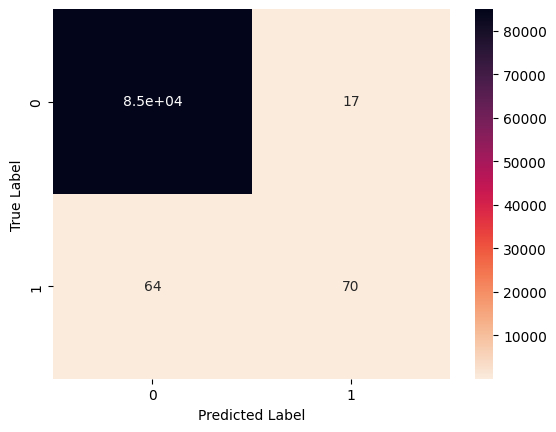

LogisticRegression(max_iter=1000)

In [ ]:
print('Evaluation of Logistic Regression: ')
result(LogisticRegression(max_iter=1000), "LogisticRegression", X_train, y_train, X_test, y_test)

Evaluation of Decision Tree Classifier: 
Results for DecisionTreeClassifier:
Accuracy: 0.999072
Precision: 0.689655
Recall: 0.746269
F1-score: 0.716846
ROCAUC-score: 0.872870

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.69      0.75      0.72       134

    accuracy                           1.00     85118
   macro avg       0.84      0.87      0.86     85118
weighted avg       1.00      1.00      1.00     85118



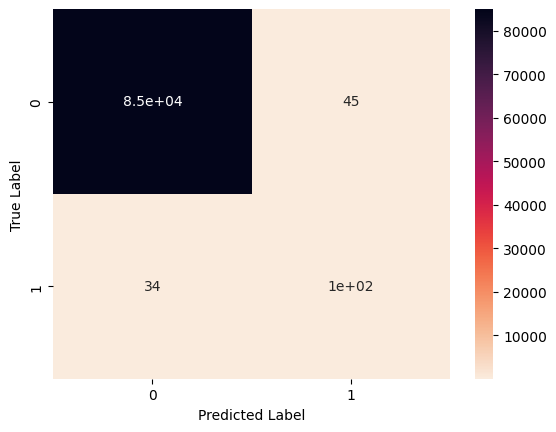

DecisionTreeClassifier()

In [ ]:
print('Evaluation of Decision Tree Classifier: ')
result(DecisionTreeClassifier(), "DecisionTreeClassifier", X_train, y_train, X_test, y_test)

Evaluation of k-Nearest Neighbors: 
Results for KNeighborsClassifier:
Accuracy: 0.998461
Precision: 0.8
Recall: 0.029851
F1-score: 0.057554
ROCAUC-score: 0.514919

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.80      0.03      0.06       134

    accuracy                           1.00     85118
   macro avg       0.90      0.51      0.53     85118
weighted avg       1.00      1.00      1.00     85118



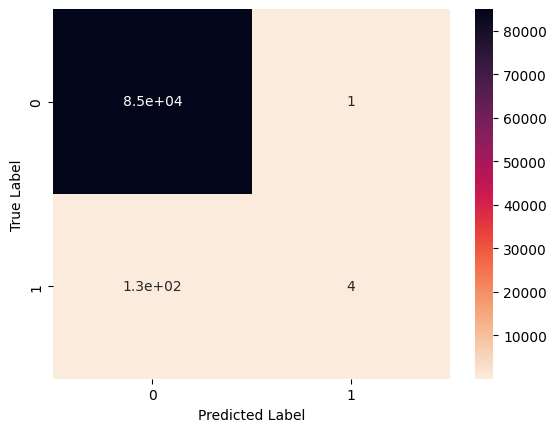

KNeighborsClassifier()

In [ ]:
print('Evaluation of k-Nearest Neighbors: ')
result(KNeighborsClassifier(), "KNeighborsClassifier", X_train, y_train, X_test, y_test)

Evaluation of XGBoost: 
Results for XGBClassifier:
Accuracy: 0.999589
Precision: 0.954128
Recall: 0.776119
F1-score: 0.855967
ROCAUC-score: 0.888030

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.95      0.78      0.86       134

    accuracy                           1.00     85118
   macro avg       0.98      0.89      0.93     85118
weighted avg       1.00      1.00      1.00     85118



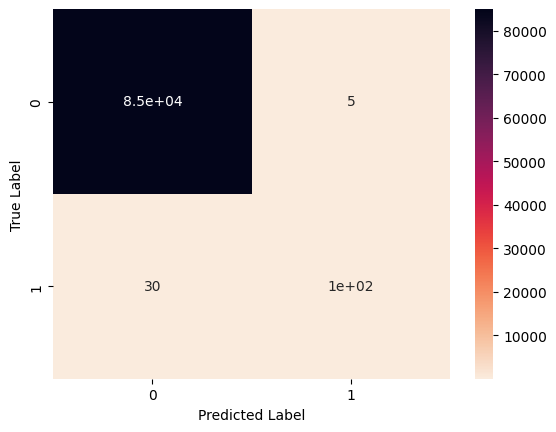

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print('Evaluation of XGBoost: ')
result(XGBClassifier(), "XGBClassifier", X_train, y_train, X_test, y_test)

Evaluation of RandomForest: 
Results for RandomForest:
Accuracy: 0.999518
Precision: 0.951456
Recall: 0.731343
F1-score: 0.827004
ROCAUC-score: 0.865642

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.95      0.73      0.83       134

    accuracy                           1.00     85118
   macro avg       0.98      0.87      0.91     85118
weighted avg       1.00      1.00      1.00     85118



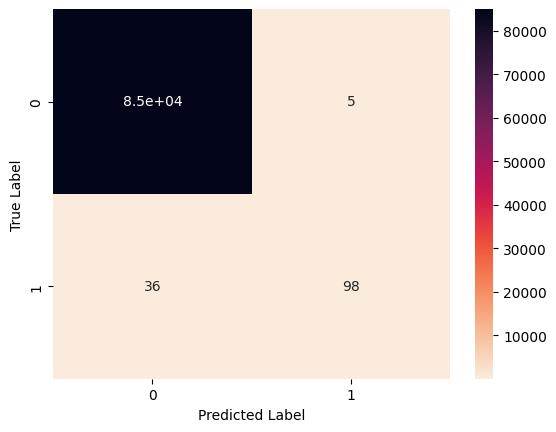

RandomForestClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
print('Evaluation of RandomForest: ')
result(RandomForestClassifier(), "RandomForest", X_train, y_train, X_test, y_test)